# Worksheet 06

Name: Woohyeon Her <br>
UID: U88838753

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

For K means, the initialization is random. For K means ++, it picks the first centroid randomly and chooses the next centroid with probability proportional to distance from the previos centroid. 

b) What are some limitations of K means ++?

K means ++ shares similar limitations as K means. It is not suitable for non-convex clusters, and it is sensitive to outliers as well.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

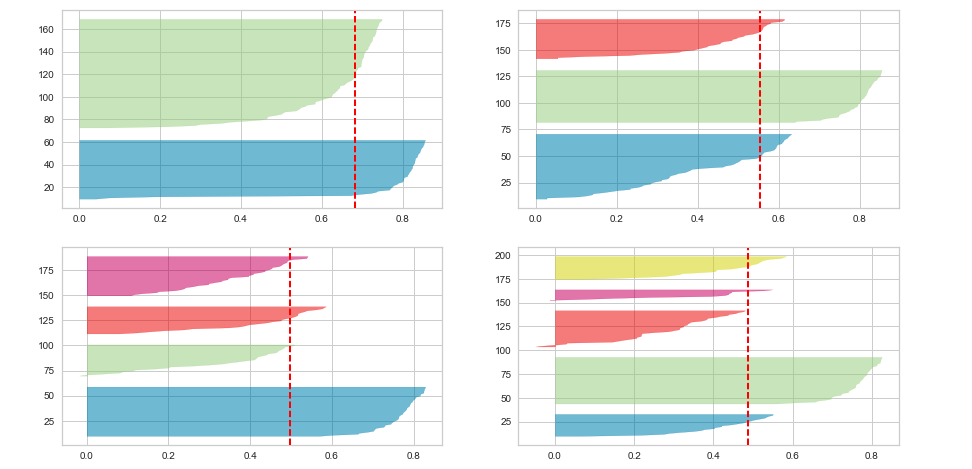

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

In the plot above, you can see the silhouette score is dropping as the number of K increases. I would pick my K to be 5, in judging from the result produced at the bottom right. All the silhouettes are touching the score line, so it looks like clusters are well distributed.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |√2   |  3 | 1  | √8  |
| B | √2  | 0 |  √10 |  1 | √2  |
| C | 3  | √10  | 0 | √10  | √2  |
| D | 1  |  1 |  √10 | 0 | √5  |
| E | √8  | √2  |√2   | √5  | 0 |

Step 2

|   | AB  | C  | D  | E  |
|---|---|---|---|---|
|  AB | 0 | √10  | 1  | √2  |
|  C | √10  | 0 | √10  | √2  |
|  D |  1 | √10  | 0 | √5  |
|  E |  √2 | √2  | √5  | 0 |

Step 3

|   | ABE  | C  | D  |
|---|---|---|---|
|  ABE | 0 | √10  | √2  |
|  C |  √10 | 0 | √10  |
|  D | √2  | √10  | 0 |

Step 4

|   | ABED  | C  |
|---|---|---|
|  ABED | 0 |  √10 |
|  C | √10  | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |√2   |  3 | 1  | √8  |
| B | √2  | 0 |  √10 |  1 | √2  |
| C | 3  | √10  | 0 | √10  | √2  |
| D | 1  |  1 |  √10 | 0 | √5  |
| E | √8  | √2  |√2   | √5  | 0 |

Step 2

|   | CD  |  A |  B | E  |
|---|---|---|---|---|
|  CD | 0 | √10  | √10  | √5  |
|  A |  √10 | 0 | √2  | √8  |
|  B | √10  | √2  | 0 | √2  |
|  E | √5  | √8  | √2  | 0 |

Step 3

|   | CDE  | A  | B  |
|---|---|---|---|
| CDE  | 0 | √(34/9)  |  2/3 |
|  A |  √(34/9) | 0 | √2  |
|  B | 2/3  |  √2 | 0 |

Step 4

|   |  AB | CDE  |
|---|---|---|
| AB  | 0 |  √(58/36)  |
| CDE  |  √(58/36  | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

C:\Users\Woo Hyeon Her\AppData\Local\Temp\ipykernel_13452\447879697.py:37: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='single')


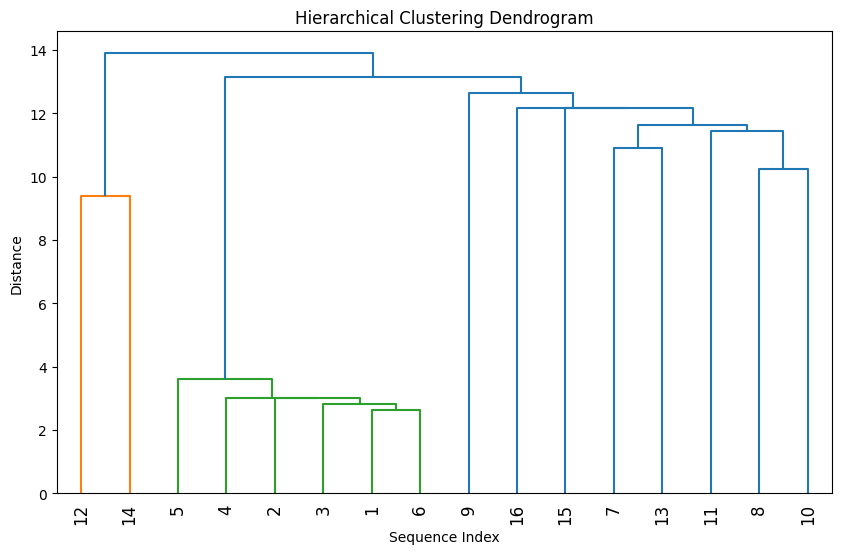

In [17]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

sequences = [
  'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

def hamming_distance(s1, s2):
    distance = sum(1 for a, b in zip(s1, s2) if a != b)
    return distance

def hierarchical_clustering(sequences):
    # Calculate pairwise distances using Hamming distance
    n = len(sequences)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distances[i, j] = hamming_distance(sequences[i], sequences[j])
            distances[j, i] = distances[i, j]

    # Perform hierarchical clustering
    linkage_matrix = linkage(distances, method='single')

    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=range(1, n + 1), leaf_rotation=90)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sequence Index')
    plt.ylabel('Distance')
    plt.show()

hierarchical_clustering(sequences)
